Automatically selected target column: part_time_job_Yes

=== Model Accuracies ===
Model                Accuracy (%)
-----------------------------------
Logistic Regression       72.00
Decision Tree             55.00
Random Forest             66.00


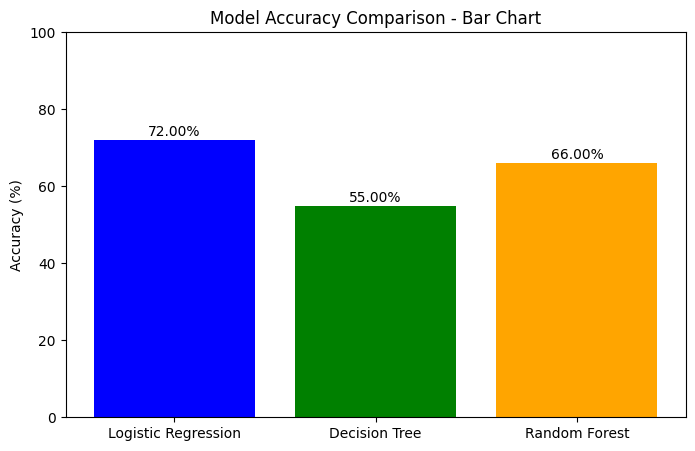

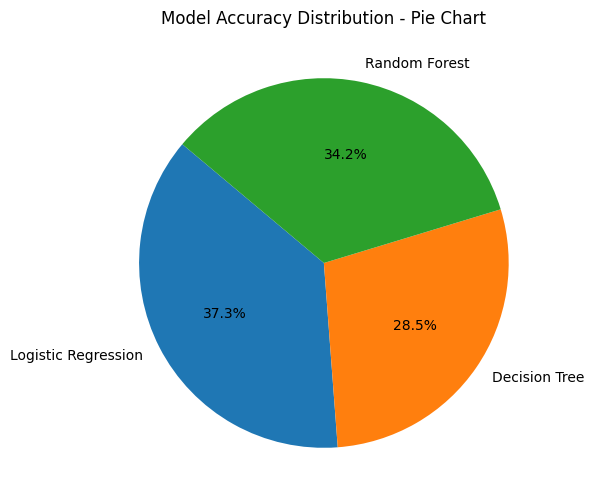


Best Model: Logistic Regression with Accuracy: 72.00%


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1. Load dataset
df = pd.read_csv("student_study_habits.csv")  # Make sure file is in same folder

# 2. Auto-select last column as target
target_column = df.columns[-1]
print(f"Automatically selected target column: {target_column}")

# 3. Encode categorical columns
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# 4. Features & Target
X = df.drop(columns=[target_column])
y = df[target_column]

# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6. Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# 7. Train & Evaluate
accuracies = {}
print("\n=== Model Accuracies ===")
print(f"{'Model':<20} {'Accuracy (%)':>12}")
print("-" * 35)
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    acc = accuracy_score(y_test, predictions) * 100
    accuracies[name] = acc
    print(f"{name:<20} {acc:>10.2f}")

# 8. Bar Chart
plt.figure(figsize=(8, 5))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'orange'])
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy Comparison - Bar Chart")
plt.ylim(0, 100)
for i, acc in enumerate(accuracies.values()):
    plt.text(i, acc + 1, f"{acc:.2f}%", ha='center', fontsize=10)
plt.show()

# 9. Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(accuracies.values(), labels=accuracies.keys(), autopct='%1.1f%%', startangle=140)
plt.title("Model Accuracy Distribution - Pie Chart")
plt.show()

# 10. Best Model
best_model = max(accuracies, key=accuracies.get)
print(f"\nBest Model: {best_model} with Accuracy: {accuracies[best_model]:.2f}%")
